In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F



In [9]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0038, -0.0315, -0.0292,  ..., -0.0355,  0.0035, -0.0034],
        [-0.0290, -0.0045,  0.0034,  ..., -0.0250, -0.0054,  0.0289],
        [-0.0028, -0.0108,  0.0018,  ..., -0.0289,  0.0205,  0.0190],
        ...,
        [-0.0336,  0.0292, -0.0334,  ..., -0.0113, -0.0203, -0.0048],
        [-0.0176, -0.0247,  0.0236,  ...,  0.0029,  0.0254,  0.0159],
        [-0.0006, -0.0262,  0.0302,  ...,  0.0112, -0.0103,  0.0349]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0024,  0.0292,  0.0163, -0.0317,  0.0230,  0.0159,  0.0185,  0.0112,
         0.0142,  0.0163,  0.0048,  0.0292, -0.0221, -0.0188, -0.0220,  0.0340,
        -0.0161,  0.0129, -0.0171, -0.0139,  0.0222,  0.0180,  0.0189, -0.0190,
        -0.0162,  0.0151,  0.0104,  0.0022, -0.0356,  0.0179, -0.0281,  0.0184,
        -0.0279, -0.0091,  0.0164, -0.0288,  0.0251, -0.0267,  0.0046, -0.0201,
        -0.0061,  0.0215,  0.0293, -0.0026, -0.0017,  0.0331, -0.0040,  0.0189,
         0.0296

In [11]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 8.9698e-03, -8.5644e-03,  6.7509e-03,  ..., -5.3204e-03,
          1.9077e-03,  1.4365e-02],
        [-2.6273e-02, -2.2826e-05, -1.6398e-02,  ...,  4.5251e-03,
          1.0175e-02,  3.3158e-03],
        [-2.7419e-02,  2.2249e-02, -5.9541e-03,  ...,  3.3355e-03,
          1.1873e-02, -6.3568e-03],
        ...,
        [ 6.6659e-03,  2.3171e-03,  7.3652e-03,  ...,  2.6081e-03,
         -4.6001e-03, -5.1600e-03],
        [ 8.1234e-04, -7.2715e-04,  3.7077e-03,  ...,  1.8657e-02,
         -1.7465e-03,  8.1238e-03],
        [-8.1834e-03,  1.2864e-02, -1.0752e-02,  ...,  1.4706e-03,
         -1.4981e-02,  9.4008e-03]])

In [14]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


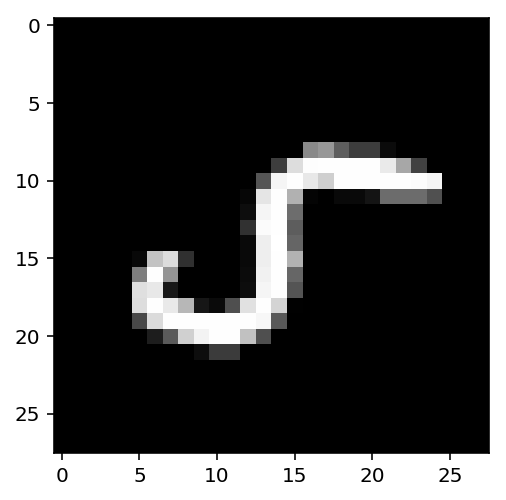

In [16]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [17]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [18]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [19]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

AttributeError: module 'helper' has no attribute 'view_classify'